In [4]:
'''
导入需要的库函数
'''
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
%load_ext sympyprinting

The sympyprinting extension is already loaded. To reload it, use:
  %reload_ext sympyprinting


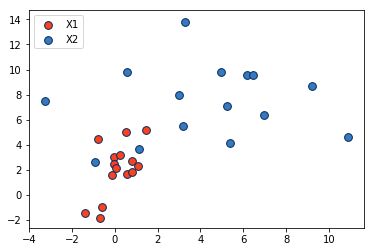

In [15]:
'''
生成两个二维正态分布样本，每个样本15组数据
'''
Num = 15;
mu1 = np.array([[0, 2]]); mu2 = np.array([[5, 8]]);
sigma1 = np.array([[1, 1],[1, 4]]); sigma2 = np.array([[10, 1],[1, 10]]);

X1 = np.random.multivariate_normal(mu1[0], sigma1, Num)
X2 = np.random.multivariate_normal(mu2[0], sigma2, Num)
plt.scatter(X1[:, 0],X1[:, 1], marker = 'o', color = '#fd411e', edgecolors = '#042e60', s = 60, label = 'X1')
plt.scatter(X2[:, 0],X2[:, 1], marker = 'o', color = '#3778bf', edgecolors = '#042e60', s = 60, label = 'X2')
plt.legend(loc = 'upper left')
plt.savefig('1.png',dpi=600)

X1是第一组样本，X2是第二组样本

In [16]:
'''
计算每个样本的均值、样本离差阵
'''
X1_mean = np.mean(X1, axis = 0); X2_mean = np.mean(X2, axis = 0);
Cov_1 = np.cov(X1[:, 0],X1[:, 1]); Cov_2 = np.cov(X2[:, 0],X2[:, 1]);
s_1 = Cov_1 * (len(X1)-1); s_2 = Cov_2 * (len(X2)-1); 
print('X1的样本均值：', X1_mean); print('X2的样本均值：', X2_mean);
print('X1的样本离差阵：\n', s_1); print('X2的样本离差阵：\n', s_2);
print('X1的样本协方差阵：\n', Cov_1); print('X2的样本协方差阵：\n', Cov_2);
inv_1 = np.linalg.inv(Cov_1); inv_2 = np.linalg.inv(Cov_2); #协方差矩阵的逆

X1的样本均值： [0.11746717 2.09160816]
X2的样本均值： [4.14943983 7.38946692]
X1的样本离差阵：
 [[ 8.55640934 14.31407234]
 [14.31407234 63.81090049]]
X2的样本离差阵：
 [[197.62953298  14.14560634]
 [ 14.14560634 123.60091744]]
X1的样本协方差阵：
 [[0.6111721  1.02243374]
 [1.02243374 4.55792146]]
X2的样本协方差阵：
 [[14.11639521  1.01040045]
 [ 1.01040045  8.82863696]]


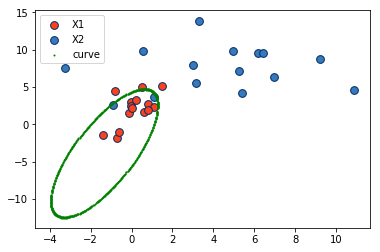

In [17]:
'''
马氏距离构造分离曲面
'''
def get_value(inv_1, inv_2, x1_mean, x2_mean, point):
    q1 = point - x1_mean; q2 = point - x2_mean
    q1 = q1.reshape([-1, 2]); q2 = q2.reshape([-1, 2]);
    tmp = np.dot(np.dot(q2,inv_2),q2.reshape([2, -1])) - np.dot(np.dot(q1,inv_1),q1.reshape([2, -1]))
    return tmp
'''
数值解求解分离曲面
'''
def get_curve(points, threshold, inv_1, inv_2, x1_mean, x2_mean):
    save_points = []
    for k in range(len(points)):
        tmp = get_value(inv_1, inv_2, X1_mean, X2_mean, points[k])
        if tmp < threshold and tmp > -threshold:
            save_points.append(points[k])
    save_points = np.array(save_points)
    save_points = save_points.reshape([-1,2])
    return save_points

a = np.arange(-20, 20, 0.05); b =np.arange(-20, 24, 0.05)
points = []
for i in range(len(a)):
    for j in range(len(b)):
        points.append(np.array([a[i],b[j]]))

save_points = get_curve(points, 0.12, inv_1, inv_2, X1_mean, X2_mean)
plt.scatter(X1[:, 0],X1[:, 1], marker = 'o', color = '#fd411e', edgecolors = '#042e60', s = 60, label = 'X1')
plt.scatter(X2[:, 0],X2[:, 1], marker = 'o', color = '#3778bf', edgecolors = '#042e60', s = 60, label = 'X2')
#plt.plot(save_points[:,0], save_points[:,1], color = 'green', label = 'curve ')
plt.scatter(save_points[:,0], save_points[:,1], marker = 'o', color = 'green', s = 1, label = 'curve')
plt.legend(loc = 'upper left')
plt.savefig('2.png',dpi=600)

In [28]:
'''
公式法求解分离曲面参数方程
'''
x, y = symbols('x y')
x1_mean, x2_mean = symbols('x1_mean x2_mean'); y1_mean, y2_mean = symbols('y1_mean y2_mean');
m1, m2, m3, m4 = symbols('m1, m2, m3, m4'); n1, n2, n3, n4 = symbols('n1, n2, n3, n4');
x1x = Matrix([[x - x1_mean, y - y1_mean]]);x2x = Matrix([[x - x2_mean, y - y2_mean]])
L1 = Matrix([[m1, m2],[m3, m4]]); L2 = Matrix([[n1, n2],[n3, n4]])
f = x1x * L1 * x1x.T - x2x * L2 * x2x.T
k = f[0].subs({x1_mean: X1_mean[0], x2_mean: X2_mean[0], y1_mean: X1_mean[0], y2_mean: X2_mean[1],
           m1: inv_1[0][0], m2: inv_1[0][1], m3: inv_1[1][0], m4: inv_1[1][1],
           n1: inv_2[0][0], n2: inv_2[0][1], n3: inv_2[1][0], n4: inv_2[1][1]})
Inv_1 = np.linalg.inv(sigma1);Inv_2 = np.linalg.inv(sigma2);
kk = f[0].subs({x1_mean: 0, x2_mean: 5, y1_mean: 2, y2_mean: 8,
           m1: Inv_1[0][0], m2: Inv_1[0][1], m3: Inv_1[1][0], m4: Inv_1[1][1],
           n1: Inv_2[0][0], n2: Inv_2[0][1], n3: Inv_2[1][0], n4: Inv_2[1][1]})
j = simplify(k)
jj = simplify(kk) * 2
latex(j)
print('通过样本估计马氏距离构造的分离曲面方程：\n', str(j) + ' = 0')
print('总体马氏距离构造的分离曲面方程：\n', str(jj) + ' = 0')

通过样本估计马氏距离构造的分离曲面方程：
 2.54761332261985*x**2 - 1.1586576186851*x*y - 0.00533913267280495*x + 0.236983764973751*y**2 + 1.67548424828184*y - 6.93970888078361 = 0
总体马氏距离构造的分离曲面方程：
 2.46464646464646*x**2 - 1.29292929292929*x*y + 4.36363636363636*x + 0.464646464646465*y**2 + 0.363636363636364*y - 13.6969696969697 = 0


In [23]:
'''
回报法求错判率
'''
def report_error(points, curve_function, order):
    error = 0
    for i in range(len(points)):
        tmp = get_value(inv_1, inv_2, X1_mean, X2_mean, points[i])
        if (order - 1.5) * tmp > 0:
            error += 1
    return error
error1 = report_error(X1, j, 1); error2 = report_error(X2, j, 2)
result = (error1 + error2) / (len(X1) + len(X2))
print('回报法求出的错判率为：%.2f%%' % (result * 100))

回报法求出的错判率为：16.67%
